<a href="https://colab.research.google.com/github/DTVasques/Plants-Taxonomy/blob/master/Distribution_maps_from_GBIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing distribution maps using ggplot 

This tutorial will explain how to draw distribution maps using the ggplot package in R. 
We will be plotting occurrence data for Oxalis corniculata L. (Oxalidaceae) and Oxalis debilis Kunth. (Oxalidaceae) in Japan, and the data was obtained from GBIF.

Code references: 
Source1: https://www.r-spatial.org/r/2018/10/25/ggplot2-sf-2.html
Source2: https://www.r-bloggers.com/2021/03/downloading-and-cleaning-gbif-data-with-r/

Documentation:
https://www.rdocumentation.org/packages/rgbif/versions/3.7.1/topics/occ_data


# Step 1) Install Packages

In [ ]:
install.packages("ggplot2")
install.packages("sf")
install.packages("rnaturalearth")
install.packages("rnaturalearthdata")
install.packages("rgbif")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘triebeard’, ‘urltools’, ‘httpcode’, ‘crul’, ‘oai’




# Step 2) Download libraries

In [ ]:
library("ggplot2")
theme_set(theme_bw())
library("sf")
library("rnaturalearth")
library("rnaturalearthdata")
library("rgbif")

Linking to GEOS 3.9.1, GDAL 3.3.2, PROJ 7.2.1; sf_use_s2() is TRUE

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 


Attaching package: ‘rnaturalearthdata’


The following object is masked from ‘package:rnaturalearth’:

    countries110




# Step 3) Download and filter the occurrence data from GBIF

In [ ]:
myspecies <- c("Hymenophyllum polyanthos", "Hymenophyllum wrightii")

gbif_data <- occ_data(scientificName = myspecies, hasCoordinate = TRUE, country = "JP", limit = 2000) 

Obs1: download GBIF occurrence data for these species; this may take a long time if there are many data points!

Obs2: "hasCoordinate" argument allows you to filter only data with GPS (latitude, longitude) information.

Obs3: "limit" argument allows you to select how many datapoints you wish to download from the records available.


## Take a look at the downloaded data:

In [ ]:
gbif_data

Occ. found [Hymeno.. (1670), Hymeno.. (692)] 
Occ. returned [Hymeno.. (1670), Hymeno.. (692)] 
Args [hasCoordinate=TRUE, occurrenceStatus=PRESENT, limit=2000, offset=0,
     scientificName=Hymenophyllum polyanthos,Hymenophyllum wrightii,
     country=JP] 
2 requests; First 10 rows of data from Hymenophyllum polyanthos

# A tibble: 1,670 × 117
   key        scientificName  decimalLatitude decimalLongitude issues datasetKey
   <chr>      <chr>                     <dbl>            <dbl> <chr>  <chr>     
 1 3864047305 Hymenophyllum …            28.3             129. ""     a51f47ec-…
 2 3864048034 Hymenophyllum …            28.3             129. ""     a51f47ec-…
 3 3864052238 Hymenophyllum …            31.1             131. ""     a51f47ec-…
 4 3864052370 Hymenophyllum …            31.1             131. ""     a51f47ec-…
 5 3864047915 Hymenophyllum …            31.1             131. ""     a51f47ec-…
 6 3864047668 Hymenophyllum …            31.1             131. ""     a51f47ec-…
 7 3864

## Check how the data are organized:

In [ ]:
names(gbif_data)

[1] "Hymenophyllum polyanthos" "Hymenophyllum wrightii"

In [ ]:
names(gbif_data[[myspecies[1]]]$data)

[1] "key"                           "scientificName"               
  [3] "decimalLatitude"               "decimalLongitude"             
  [5] "issues"                        "datasetKey"                   
  [7] "publishingOrgKey"              "installationKey"              
  [9] "hostingOrganizationKey"        "publishingCountry"            
 [11] "protocol"                      "lastCrawled"                  
 [13] "lastParsed"                    "crawlId"                      
 [15] "basisOfRecord"                 "occurrenceStatus"             
 [17] "taxonKey"                      "kingdomKey"                   
 [19] "phylumKey"                     "classKey"                     
 [21] "orderKey"                      "familyKey"                    
 [23] "genusKey"                      "speciesKey"                   
 [25] "acceptedTaxonKey"              "acceptedScientificName"       
 [27] "kingdom"                       "phylum"                       
 [29] "order"                         "family"                       
 [31] "genus"                         "species"                      
 [33] "genericName"                   "specificEpithet"              
 [35] "taxonRank"                     "taxonomicStatus"              
 [37] "iucnRedListCategory"           "dateIdentified"               
 [39] "coordinateUncertaintyInMeters" "continent"                    
 [41] "stateProvince"                 "year"                         
 [43] "month"                         "day"                          
 [45] "eventDate"                     "modified"                     
 [47] "lastInterpreted"               "license"                      
 [49] "sampleSizeUnit"                "sampleSizeValue"              
 [51] "institutionKey"                "isInCluster"                  
 [53] "recordedBy"                    "identifiedBy"                 
 [55] "samplingProtocol"              "geodeticDatum"                
 [57] "class"                         "countryCode"                  
 [59] "country"                       "identifier"                   
 [61] "eventID"                       "habitat"                      
 [63] "samplingEffort"                "locality"                     
 [65] "county"                        "municipality"                 
 [67] "collectionCode"                "gbifID"                       
 [69] "occurrenceID"                  "catalogNumber"                
 [71] "vernacularName"                "institutionCode"              
 [73] "locationID"                    "parentEventID"                
 [75] "verbatimElevation"             "elevation"                    
 [77] "elevationAccuracy"             "higherGeography"              
 [79] "georeferenceRemarks"           "language"                     
 [81] "type"                          "higherClassification"         
 [83] "otherCatalogNumbers"           "verbatimEventDate"            
 [85] "institutionID"                 "verbatimLocality"             
 [87] "collectionID"                  "recordNumber"                 
 [89] "islandGroup"                   "references"                   
 [91] "datasetID"                     "datasetName"                  
 [93] "rightsHolder"                  "nomenclaturalCode"            
 [95] "accessRights"                  "collectionKey"                
 [97] "fieldNumber"                   "waterBody"                    
 [99] "island"                        "name"                         
[101] "preparations"                  "dataGeneralizations"          
[103] "georeferenceProtocol"          "footprintWKT"                 
[105] "eventRemarks"                  "taxonRemarks"                 
[107] "verbatimIdentification"        "footprintSRS"                 
[109] "occurrenceRemarks"             "distanceFromCentroidInMeters" 
[111] "organismID"                    "ownerInstitutionCode"         
[113] "individualCount"               "nomenclaturalStatus"          
[115] "taxon

## Create and fill a list with only the 'data' section for each species:


In [ ]:
myspecies_coords_list <- vector("list", length(myspecies))

names(myspecies_coords_list) <- myspecies

for (s in myspecies) {
  coords <- gbif_data[[s]]$data[ , c("decimalLongitude", "decimalLatitude", "individualCount", "occurrenceStatus", "coordinateUncertaintyInMeters", "institutionCode", "references")]

myspecies_coords_list[[s]] <- data.frame(species = s, coords)
}

lapply(myspecies_coords_list, head)



,species,decimalLongitude,decimalLatitude,individualCount,occurrenceStatus,coordinateUncertaintyInMeters,institutionCode,references
,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>
1,Hymenophyllum polyanthos,129.3628,28.28377,NA,PRESENT,10000,NIES,NA
2,Hymenophyllum polyanthos,129.3628,28.28377,NA,PRESENT,10000,NIES,NA
3,Hymenophyllum polyanthos,130.7480,31.07697,NA,PRESENT,10000,NIES,NA
4,Hymenophyllum polyanthos,130.7480,31.07697,NA,PRESENT,10000,NIES,NA
5,Hymenophyllum polyanthos,130.7480,31.07697,NA,PRESENT,10000,NIES,NA
6,Hymenophyllum polyanthos,130.7480,31.07697,NA,PRESENT,10000,NIES,NA
,species,decimalLongitude,decimalLatitude,individualCount,occurrenceStatus,coordinateUncertaintyInMeters,institutionCode,references
,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>
1,Hymenophyllum wrightii,138.9956,36.86389,NA,PRESENT,NA,GMNHJ,NA


# Collapse the list into a data frame:


In [ ]:
myspecies_coords <- as.data.frame(do.call(rbind, myspecies_coords_list), row.names = 1:sum(sapply(myspecies_coords_list, nrow)))

head(myspecies_coords)

tail(myspecies_coords)


,species,decimalLongitude,decimalLatitude,individualCount,occurrenceStatus,coordinateUncertaintyInMeters,institutionCode,references
,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>
1,Hymenophyllum polyanthos,129.3628,28.28377,NA,PRESENT,10000,NIES,NA
2,Hymenophyllum polyanthos,129.3628,28.28377,NA,PRESENT,10000,NIES,NA
3,Hymenophyllum polyanthos,130.7480,31.07697,NA,PRESENT,10000,NIES,NA
4,Hymenophyllum polyanthos,130.7480,31.07697,NA,PRESENT,10000,NIES,NA
5,Hymenophyllum polyanthos,130.7480,31.07697,NA,PRESENT,10000,NIES,NA
6,Hymenophyllum polyanthos,130.7480,31.07697,NA,PRESENT,10000,NIES,NA


,species,decimalLongitude,decimalLatitude,individualCount,occurrenceStatus,coordinateUncertaintyInMeters,institutionCode,references
,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>
2357,Hymenophyllum wrightii,130.2870,32.7599,NA,PRESENT,NA,RYU,NA
2358,Hymenophyllum wrightii,139.2784,36.9388,NA,PRESENT,NA,TNS,http://db.kahaku.go.jp/webmuseum_en/detail?cls=col_b1_01&pkey=TNS-VS%2C24915%2C
2359,Hymenophyllum wrightii,141.0011,39.8526,NA,PRESENT,NA,TNS,http://db.kahaku.go.jp/webmuseum_en/detail?cls=col_b1_01&pkey=TNS-VS%2C1398%2C
2360,Hymenophyllum wrightii,139.5582,36.7860,NA,PRESENT,NA,TNS,http://db.kahaku.go.jp/webmuseum_en/detail?cls=col_b1_01&pkey=TNS-VS%2C1397%2C
2361,Hymenophyllum wrightii,138.0000,36.0000,NA,PRESENT,NA,F,NA
2362,Hymenophyllum wrightii,139.6222,36.7475,NA,PRESENT,NA,OMO,NA


# Step 4) Plotting the data


[1] "sf"         "data.frame"

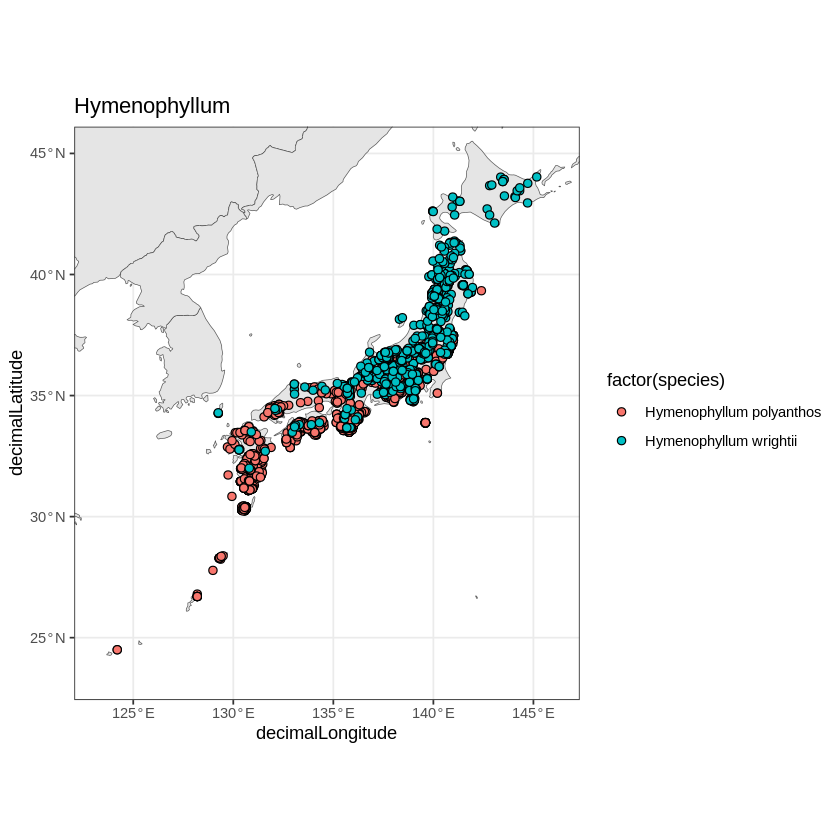

In [ ]:
world <- ne_countries(scale = "medium", returnclass = "sf")

class(world)

buff <- 1   #a buffer of one degree around the raster

xmin <- min(myspecies_coords$decimalLongitude) - buff
xmax <- max(myspecies_coords$decimalLongitude) + buff
ymin <- min(myspecies_coords$decimalLatitude) - buff
ymax <- max(myspecies_coords$decimalLatitude) + buff

ggplot(data = world) +
  geom_sf() +
  geom_point(data = myspecies_coords, aes(x = decimalLongitude, y = decimalLatitude, fill = factor(species)), size = 2, 
             shape = 21) +
  coord_sf(xlim = c(xmin, xmax), ylim = c(ymin, ymax)) + ggtitle('Hymenophyllum') 


# Step5) Further edit the plots colors and shapes

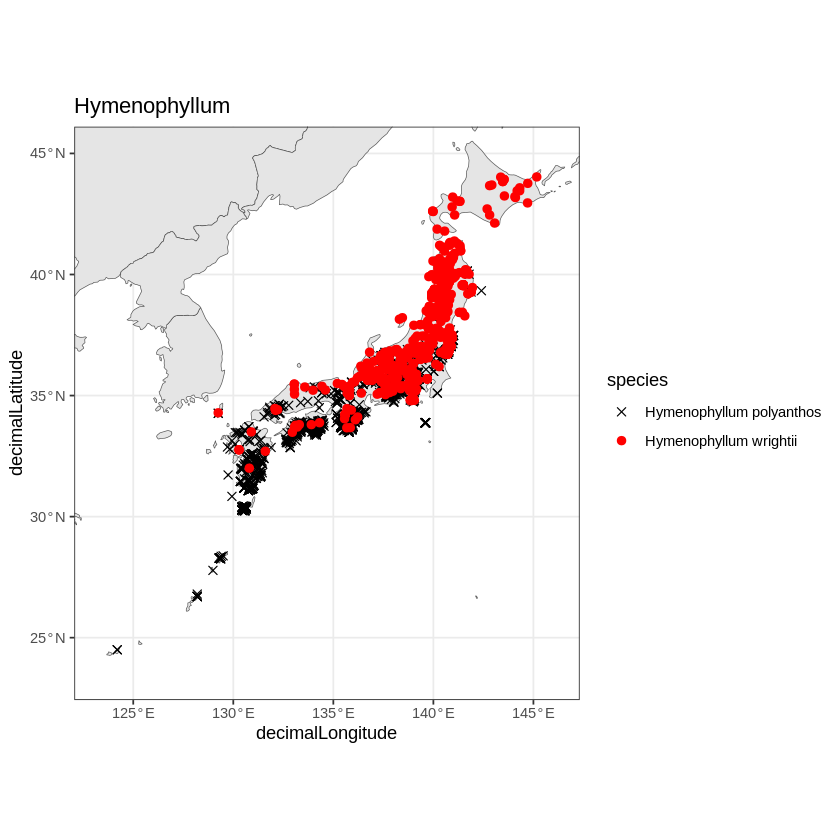

In [ ]:
buff <- 1   #a buffer of one degree around the raster

xmin <- min(myspecies_coords$decimalLongitude) - buff
xmax <- max(myspecies_coords$decimalLongitude) + buff
ymin <- min(myspecies_coords$decimalLatitude) - buff
ymax <- max(myspecies_coords$decimalLatitude) + buff

ggplot(data = world) + geom_sf() + geom_point(data = myspecies_coords, aes(x = decimalLongitude, y = decimalLatitude, shape = species, color = species, fill = species), size = 2) + 
  scale_shape_manual(values=c(4, 21)) +
  scale_color_manual(values=c('black', 'red')) +
  scale_fill_manual(values=c('black', 'red')) +
  coord_sf(xlim = c(xmin, xmax), ylim = c(ymin, ymax)) + ggtitle('Hymenophyllum') 